# Data

pages: 8


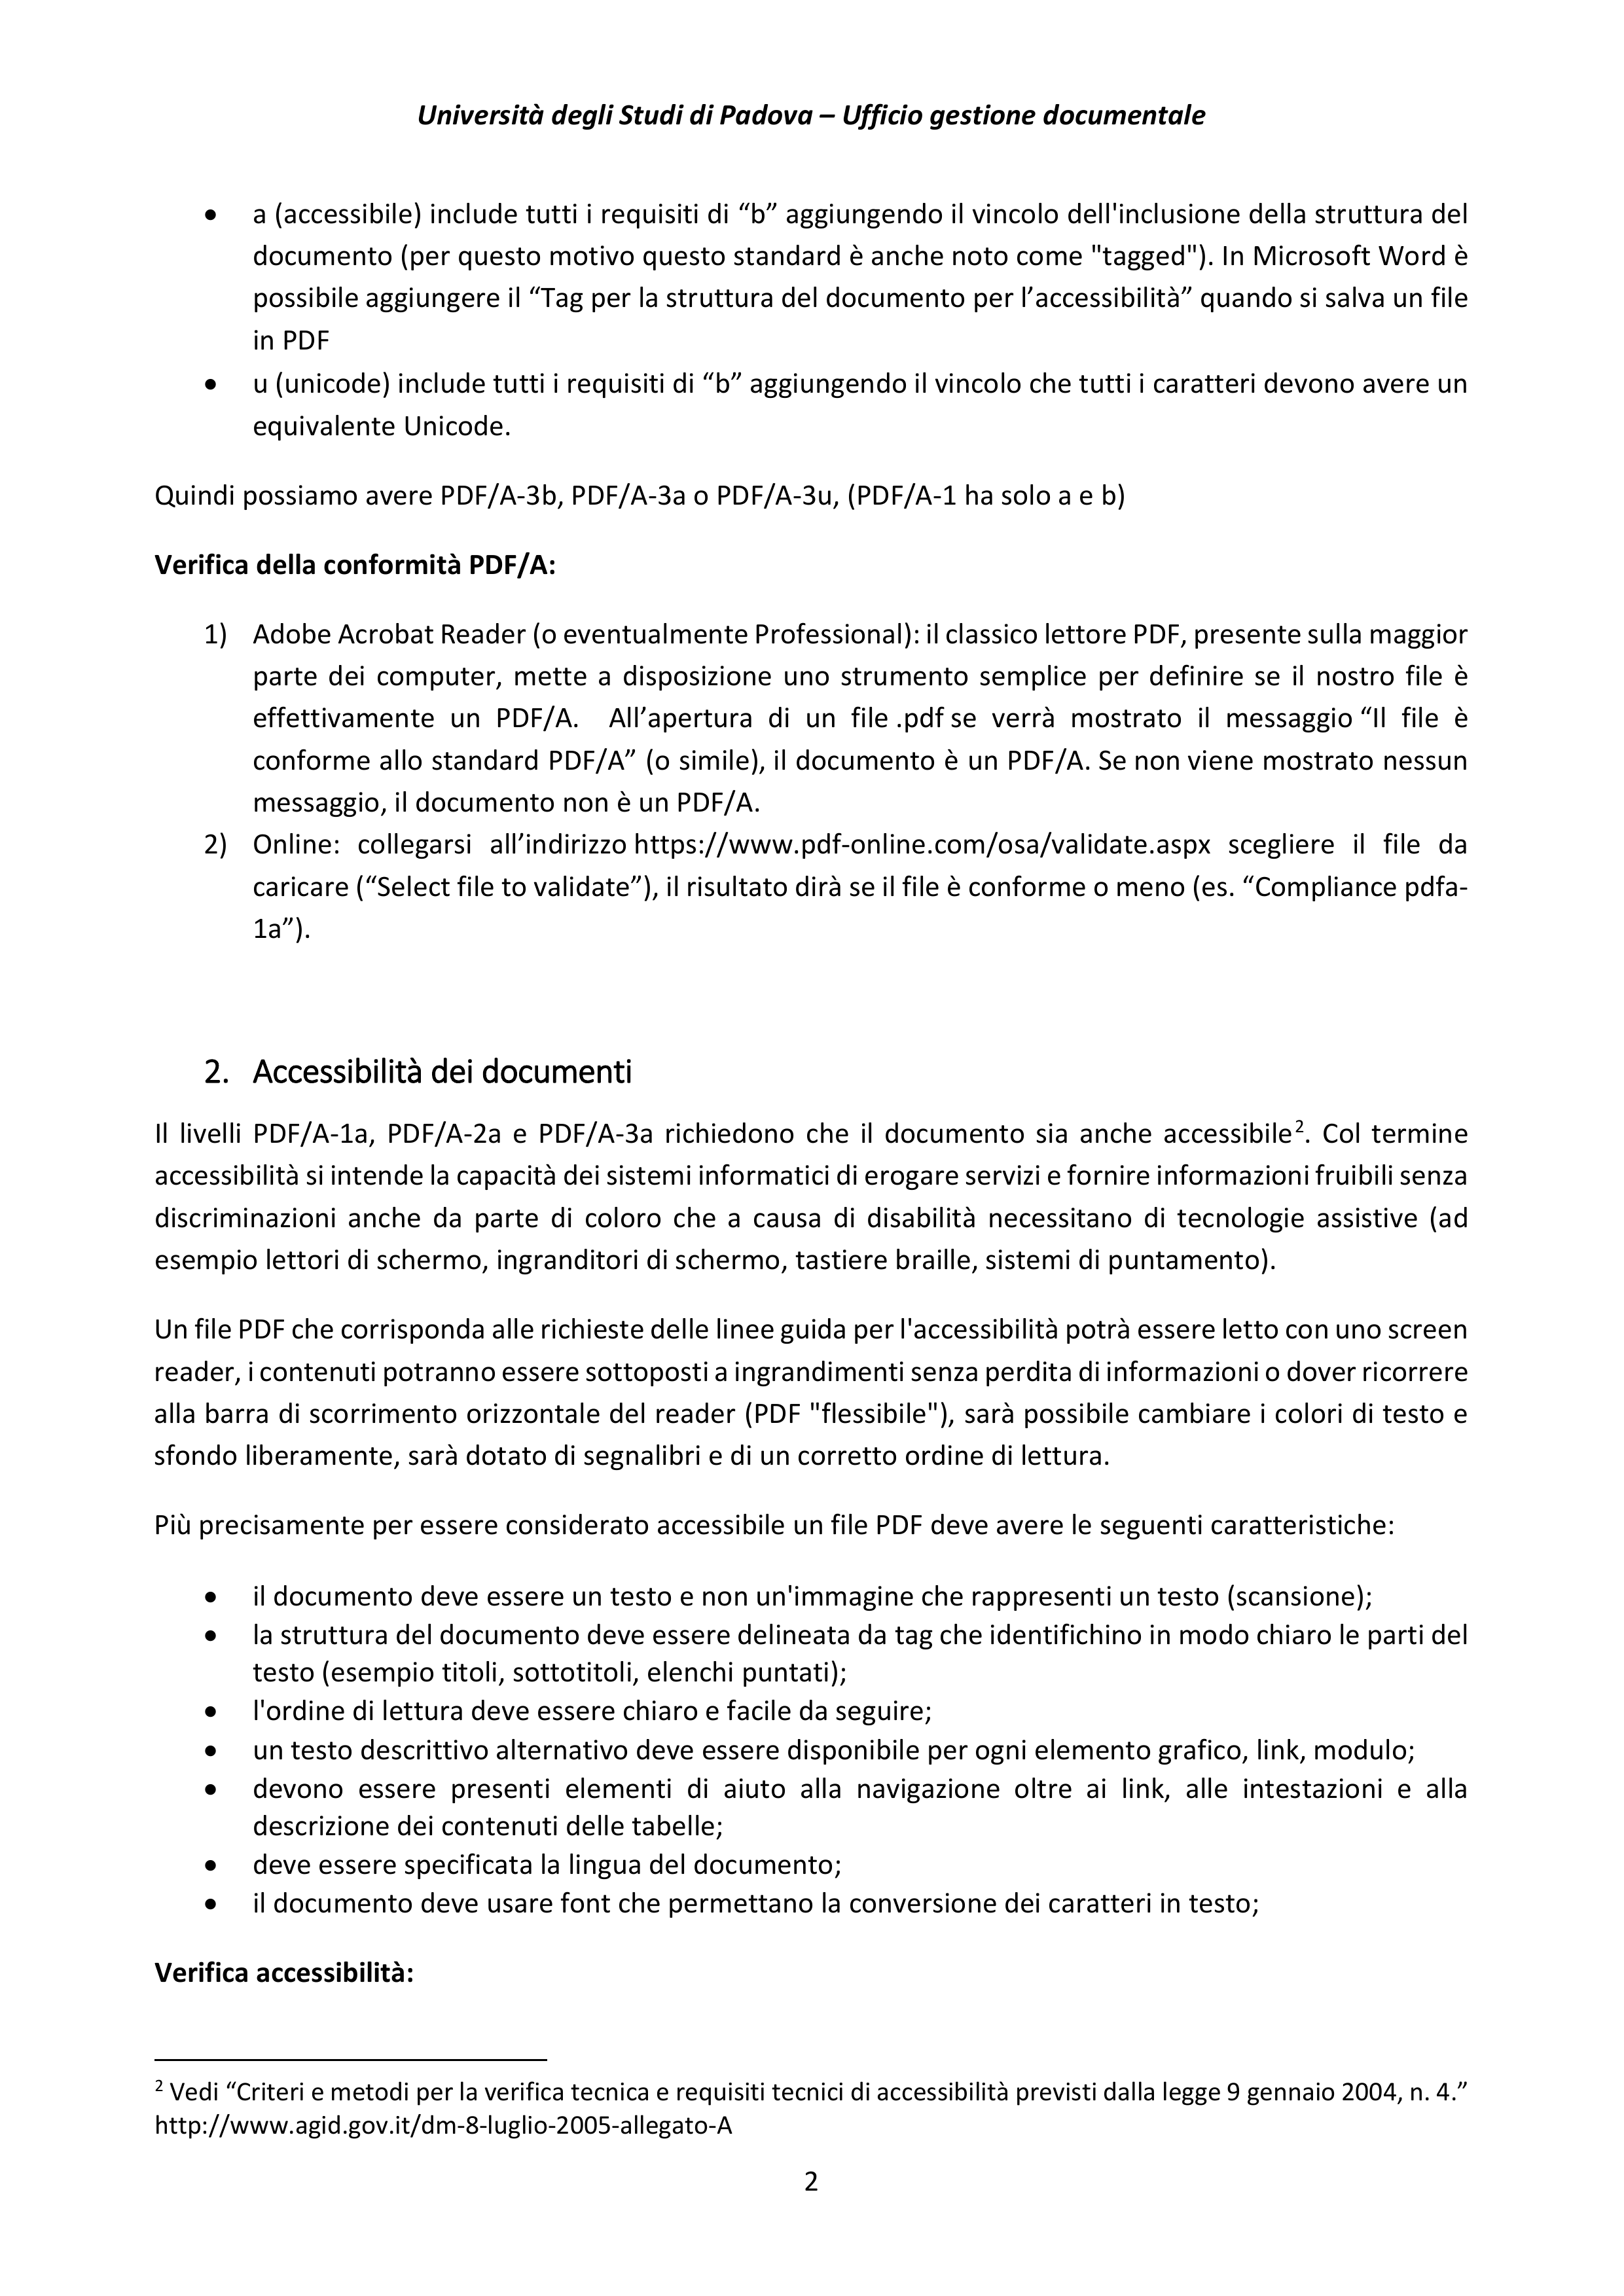

In [4]:
#conda install -c conda-forge poppler
import pdf2image #1.17.0

doc_img = pdf2image.convert_from_path("data/pdf_a.pdf", dpi=300)

print("pages:", len(doc_img))
doc_img[1]

In [7]:
import pytesseract #0.3.10

# Set the correct path to tesseract (adjust if needed)
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

# Check if Tesseract is accessible
print(pytesseract.get_tesseract_version())

from tqdm.notebook import tqdm

doc_txt = []
for page in tqdm(doc_img):
    text = pytesseract.image_to_string(page)
    doc_txt.append(text)

doc_txt[1]

5.5.0.20241111


  0%|          | 0/8 [00:00<?, ?it/s]

'Universita degli Studi di Padova — Ufficio gestione documentale\n\na (accessibile) include tutti i requisiti di “b” aggiungendo il vincolo dell\'inclusione della struttura del\ndocumento (per questo motivo questo standard é anche noto come "tagged"). In Microsoft Word é\npossibile aggiungere il “Tag per la struttura del documento per I’accessibilita” quando si salva un file\nin PDF\n\nu (unicode) include tutti i requisiti di “b” aggiungendo il vincolo che tutti i caratteri devono avere un\nequivalente Unicode.\n\nQuindi possiamo avere PDF/A-3b, PDF/A-3a o PDF/A-3u, (PDF/A-1 ha solo a e b)\n\nVerifica della conformita PDF/A:\n\n1)\n\n2)\n\n2.\n\nAdobe Acrobat Reader (o eventualmente Professional): il classico lettore PDF, presente sulla maggior\nparte dei computer, mette a disposizione uno strumento semplice per definire se il nostro file é\neffettivamente un PDF/A. All’apertura di un file .pdfse verra mostrato il messaggio “Il file é\nconforme allo standard PDF/A” (o simile), il docum

# Preprocessing 

In [27]:
lst_docs, lst_ids, lst_metadata = [], [], []

for n, page in enumerate(doc_txt):
    try:
        ## Clean page
        page = page.replace("Table of Contents", "")

        ## Get paragraph
        for i, p in enumerate(page.split('\n\n')):
            if len(p.strip()) > 5:
                lst_docs.append(p.strip())
                lst_ids.append(str(n) + "_" + str(i))
                lst_metadata.append({})  # No title metadata
    except:
        continue

print(len(lst_docs), "=", len(lst_ids), "=", len(lst_metadata))

129 = 129 = 129


In [24]:
for id, doc, meta in zip(lst_ids[1:5], lst_docs[1:5], lst_metadata[1:5]):
    print(id, "-", meta, "\n", doc, "\n")

0_1 - None 
 Istruzioni per produrre un documento PDF/A accessibile 

0_2 - None 
 Sommario 

0_3 - None 
 Allegato 1: Istruzioni per produrre un documento PDF/A accesSibile ............:cccscccsssceessecessecesseecseeeessecesseeeaees 1
1. I formato PDF/A wu... cccccesssccccceecscsnsccecceccecsesenacceceescecsnaeaecececucsessnneaeeeeccessenaaeeccesceessnnaeeecseeceeenaeeeeserees 1
2.  Accessibilita dei DOCUMENT «00... cece ceeeeeceeeeeaeeeeaceceeeeeceaeeeeaaeeeaaeceeaeecaeeeeaaeeseaeeseseeeeaeeesaaeeeeaaeseeeeeesas 2
3. Formazione dei document é firme 200... cece ccceceeneeeececeeeeeesaeceeaeeceeeeecaeeesaeeeeaaecseaeeceaeeeeaaeeesaeseeaeeseeeees 3
4. Come produrre un file PDF/A da docUMENtO "OFFICE" oo... eeeccccsseceessecesseceseeecsececscecesseccsseeesaeeecsueceseees 3
5. Come produrre un file PDF/A da scanner (documento analOgicO) ...........ccccccsssceessecesseceseeeeseceesseceseeess 5
6. Accessibilita di un file PDF/A da docUMENtO "OFFICE... cece cecessessccececcecsssseaececcesce

# LLM Generator

## Text

In [14]:
import ollama #0.2.1

def keyword_generator(p, top=3):
    prompt = "summarize the following paragraph in 3 keywords separated by ,: "+p
    res = ollama.generate(model="llama3.2", prompt=prompt)["response"]
    #lst = [k.replace("\n"," ").strip() for k in res.split(",")][:top]
    #str = ", ".join(lst)
    return res.replace("\n"," ").strip()

p = '''Professional artists, architects and designers use NVIDIA partner products accelerated with our GPUs and software platform for a range of creative and design
use cases, such as creating visual effects in movies or designing buildings and products. In addition, generative Al is expanding the market for our workstation-
class GPUs, as more enterprise customers develop and deploy Al applications with their data on-premises.'''
print(keyword_generator(p))

Here are 3 keywords that summarize the paragraph:  NVIDIA GPUs, Creative, Enterprise


## Image

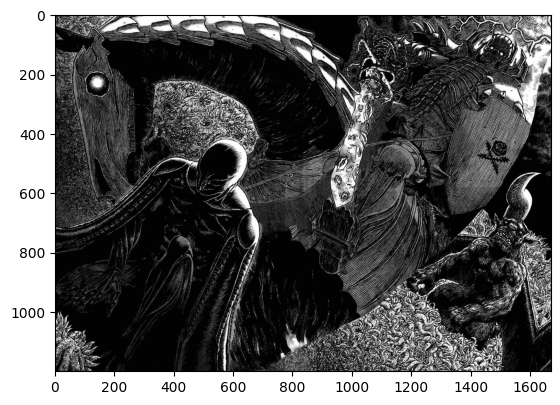

In [17]:
from matplotlib import image, pyplot

image_file = "data/berserk.jpg"

pyplot.imshow(image.imread(image_file))
pyplot.show()

In [18]:
## Encode the image into a string
import base64

def encode_image(path):
    with open(path, "rb") as file:
        return base64.b64encode(file.read()).decode('utf-8')

img = encode_image(image_file)
img[:1000]

'/9j/4AAQSkZJRgABAgAAAQABAAD/2wBDABIMDQ8NCxIPDg8UExIVGy0dGxgYGzcnKSAtQTlEQ0A5Pz1IUWdXSExhTT0/WnpbYWpuc3VzRVZ/iH5wh2dxc2//2wBDARweHigjKE8rK0+nb15vp6enp6enp6enp6enp6enp6enp6enp6enp6enp6enp6enp6enp6enp6enp6enp6enp6f/wAARCASwBocDASEAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDl7DcDBGVCh5QyS46Y4atO7X+1bm4S2UtIEBUogHmSDg/mB+dAFdIxNZJFLbs3lt5cU0bhCnJJDL3PXmpLiQ2ytbRyKzODFI+wITGDnjPc/wBKAILxHtHNqmxgqj5yRwrc7WA6ke1Pja5Dwxabdbvs/wC9ZyoRYz7E8kfWgCx

In [19]:
## LLaVA
prompt = "describe the image"
res = ollama.generate(model="llava", prompt=prompt, images=[img])["response"]
print(res)

 The image is a black and white illustration that appears to be a digital art piece. It features a character dressed in a robed outfit with a hood, holding what looks like a staff or wand, standing in front of an intricate design on a wall. To the right of the character, there are various shapes and patterns, including a partial depiction of a humanoid figure that appears to be interacting with the character. The background is dark, with the exception of a small area near the bottom left corner where some lighter tones create a textured appearance, possibly representing grass or foliage. There is no visible text in the image. The style of the illustration suggests a fantasy or magical theme. 


# Database

In [38]:
import chromadb #0.5.0

db = chromadb.PersistentClient()
db.list_collections()

['nvidia', 'pdf']

In [30]:
collection_name = "pdf"

# Get list of collection names instead of objects
existing_collections = db.list_collections()

# Check if collection exists before deleting
if collection_name in existing_collections:
    db.delete_collection(collection_name)
    print("--- deleted ---")

# Create or retrieve collection
collection = db.get_or_create_collection(name=collection_name, 
                                         embedding_function=chromadb.utils.embedding_functions.DefaultEmbeddingFunction())

# Add documents
collection.add(documents=lst_docs, ids=lst_ids, metadatas=None, 
               images=None, embeddings=None)

# Peek at one document
print(collection.peek(1))


{'ids': ['0_0'], 'embeddings': array([[ 8.52985587e-03,  5.52933887e-02,  9.87630244e-03,
        -1.29122734e-02, -7.85887837e-02, -6.43066317e-02,
        -1.05357483e-01,  3.33977565e-02,  6.77233422e-03,
         2.51842644e-02,  4.42924090e-02,  5.63757904e-02,
        -2.32576784e-02,  5.36327250e-03, -5.12048788e-02,
        -6.69646636e-02, -5.95770404e-03, -1.35330651e-02,
         8.17135442e-03,  8.90534371e-03,  4.14912514e-02,
        -9.57523659e-03,  3.28404107e-03, -9.68170352e-03,
         8.99717305e-03,  2.95823310e-02,  9.56251577e-04,
        -2.04935838e-02,  2.96095200e-02, -4.68835309e-02,
         2.42818408e-02,  7.56013393e-02,  7.45749101e-02,
        -1.82156898e-02,  3.44477519e-02,  7.44399754e-03,
         2.83091329e-02, -5.56501187e-02,  5.66704422e-02,
         1.09155059e-01, -7.02696294e-02, -3.23091857e-02,
         1.43631510e-02,  4.78050560e-02,  8.36299583e-02,
        -8.82895887e-02, -4.82288785e-02, -5.42962253e-02,
        -5.10517769e-02, 

In [33]:
query = "what is a pdf/a?"
collection.query(query_texts=[query])

{'ids': [['3_13',
   '1_8',
   '0_5',
   '0_4',
   '3_11',
   '4_12',
   '3_12',
   '3_4',
   '2_13',
   '2_14']],
 'embeddings': None,
 'documents': [['* http://www.pdfforge.org/pdfcreator',
   'Adobe Acrobat Reader (o eventualmente Professional): il classico lettore PDF, presente sulla maggior\nparte dei computer, mette a disposizione uno strumento semplice per definire se il nostro file é\neffettivamente un PDF/A. All’apertura di un file .pdfse verra mostrato il messaggio “Il file é\nconforme allo standard PDF/A” (o simile), il documento é un PDF/A. Se non viene mostrato nessun\nmessaggio, il documento non é un PDF/A.',
   'Il formato PDF/A (PDF for Archiving) é una versione standardizzata di PDF specializzato per la conservazione\ndigitale nel lungo periodo dei documenti informatici?. Garantisce che i documenti possano essere aperti\nanche nel futuro senza bisogno di particolari software che negli anni potrebbero diventare obsoleti o non piu\nsupportati.',
   '1. Il formato PDF/A',

In [34]:
res_db = collection.query(query_texts=[query])["documents"][0][0:10]
context = ' '.join(res_db).replace("\n", " ")
context

'* http://www.pdfforge.org/pdfcreator Adobe Acrobat Reader (o eventualmente Professional): il classico lettore PDF, presente sulla maggior parte dei computer, mette a disposizione uno strumento semplice per definire se il nostro file é effettivamente un PDF/A. All’apertura di un file .pdfse verra mostrato il messaggio “Il file é conforme allo standard PDF/A” (o simile), il documento é un PDF/A. Se non viene mostrato nessun messaggio, il documento non é un PDF/A. Il formato PDF/A (PDF for Archiving) é una versione standardizzata di PDF specializzato per la conservazione digitale nel lungo periodo dei documenti informatici?. Garantisce che i documenti possano essere aperti anche nel futuro senza bisogno di particolari software che negli anni potrebbero diventare obsoleti o non piu supportati. 1. Il formato PDF/A e PDFCreator: é utile non solo per produrre file PDF/A da qualsiasi tipo di documento, ma in particolare Assicurarsi che all\'interno del ment "Salva" il formato del file predefi

In [35]:
# Chat with Context only
res = ollama.chat(model="llama3.2", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using only \
                                                         the folling information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

Secondo il testo fornito, una PDF/A (PDF for Archiving) è una versione standardizzata di PDF specializzato per la conservazione digitale nel lungo periodo dei documenti informatici.

La PDF/A garantisce che i documenti possano essere aperti anche nel futuro senza bisogno di particolari software che potrebbero diventare obsoleti o non più supportati.


In [37]:
# Chat with knowledge + Context
res = ollama.chat(model="llama3.2", 
                  messages=[{"role":"system", "content":"Give the most accurate answer using your knowledge \
                                                         and the folling additional information: \n"+context},
                            {"role":"user", "content":query}])
print(res["message"]["content"])

Un PDF/A (PDF for Archiving) è una versione standardizzata del formato PDF (Portable Document Format) specializzato per la conservazione digitale dei documenti informatici nel lungo periodo. È uno standard che garantisce che i file PDF possano essere aperti anche nel futuro senza bisogno di particolari software obsoleti o non più supportati.

Il formato PDF/A è stato sviluppato per soddisfare le esigenze della conservazione digitale, in particolare per l'archiviazione e la conservazione di documenti importanti come atti giudiziari, contratti, documenti aziendali e altri tipi di file PDF che devono essere mantenuti nel tempo.

Le caratteristiche principali del formato PDF/A includono:

1. **Conformità al format**: i file PDF/A devono conformarsi a una serie di standard specifici per garantire la loro compatibilità con lettori future.
2. **Conservazione della struttura**: i file PDF/A devono mantenere la stessa struttura e le stesse informazioni del documento originale.
3. **Inclusione d